# Total Number of Personal Bankruptcies Over the Last ~20 Years in Australia

The Australian Financial Security Authority (AFSA) publishes personal insolvency statistics on bankruptcies. A bankruptcy is defined as someone who cannot pay their debts and enters an agreement where their estate is administered by a trustee to help arrange paying back debtors.

https://www.data.gov.au/dataset/ds-dga-83420759-8af8-4c28-b29f-3b6e7751aad6/details

I am reviewing this data to see how Australia is trending with their credit crisis.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Extract and Clean Data

#Import data with 

df = pd.read_excel('https://data.gov.au/data/dataset/83420759-8af8-4c28-b29f-3b6e7751aad6/resource/9fb288e8-b7a8-4e9b-bb36-d69822607cd8/download/provisional-personal-insolvencies-time-series.xlsx',
                     sheet_name = "Bankruptcies",
                     skiprows = 3,
                   skip_footer = 139)

#Get column names from original source and put into list

Column_Names = pd.read_excel('https://data.gov.au/data/dataset/83420759-8af8-4c28-b29f-3b6e7751aad6/resource/9fb288e8-b7a8-4e9b-bb36-d69822607cd8/download/provisional-personal-insolvencies-time-series.xlsx',
                     sheet_name = "Bankruptcies",
                     skiprows = 1,)

Column_Names = Column_Names.iloc[0].tolist()

#Change column names for dataframe

df.columns = Column_Names

#Change the one column name that didn't want to be on the same row...

df.rename(columns={df.columns[0]: 'Financial Year'}, inplace = True)


#Identified "**" on financial year 2017-2018. This referenced the following:
#** There is a series break in the September quarter 2017.
#From this quarter, geographic coding of personal insolvency statistics follows a new method.
#National totals are not affected.


# Removed "**"
df['Financial Year'] = df['Financial Year'].map(lambda x: x.rstrip('**'))

#Create two new columns to change years from 1986-87 to [1986] [1987]
df['Financial_Year_Start'] = df['Financial Year'].str[:4]
df['Financial_Year_End'] = df['Financial_Year_Start'].str[:2] + df['Financial Year'].str[-2:]
df['Financial_Year_End'].replace('1900', '2000', inplace=True)
df['Financial_Year_End'].replace('1980', '1990', inplace=True)

df.head()



,Financial Year,NSW,ACT,Vic,Qld,SA,NT,WA,Tas,Other,Total,Financial_Year_Start,Financial_Year_End
0,1986–87,1772,0,1289,1744,1353,62,916,398,n.a.,7534,1986,1987
1,1987–88,2051,0,1633,1799,1495,82,946,498,n.a.,8504,1987,1988
2,1988–89,2010,0,1503,1407,1327,85,759,344,n.a.,7435,1988,1989
3,1989–90,2160,70,1809,1591,1319,75,1088,440,n.a.,8552,1989,1990
4,1990–91,2991,391,3189,2460,1653,81,1846,480,n.a.,13091,1990,1991


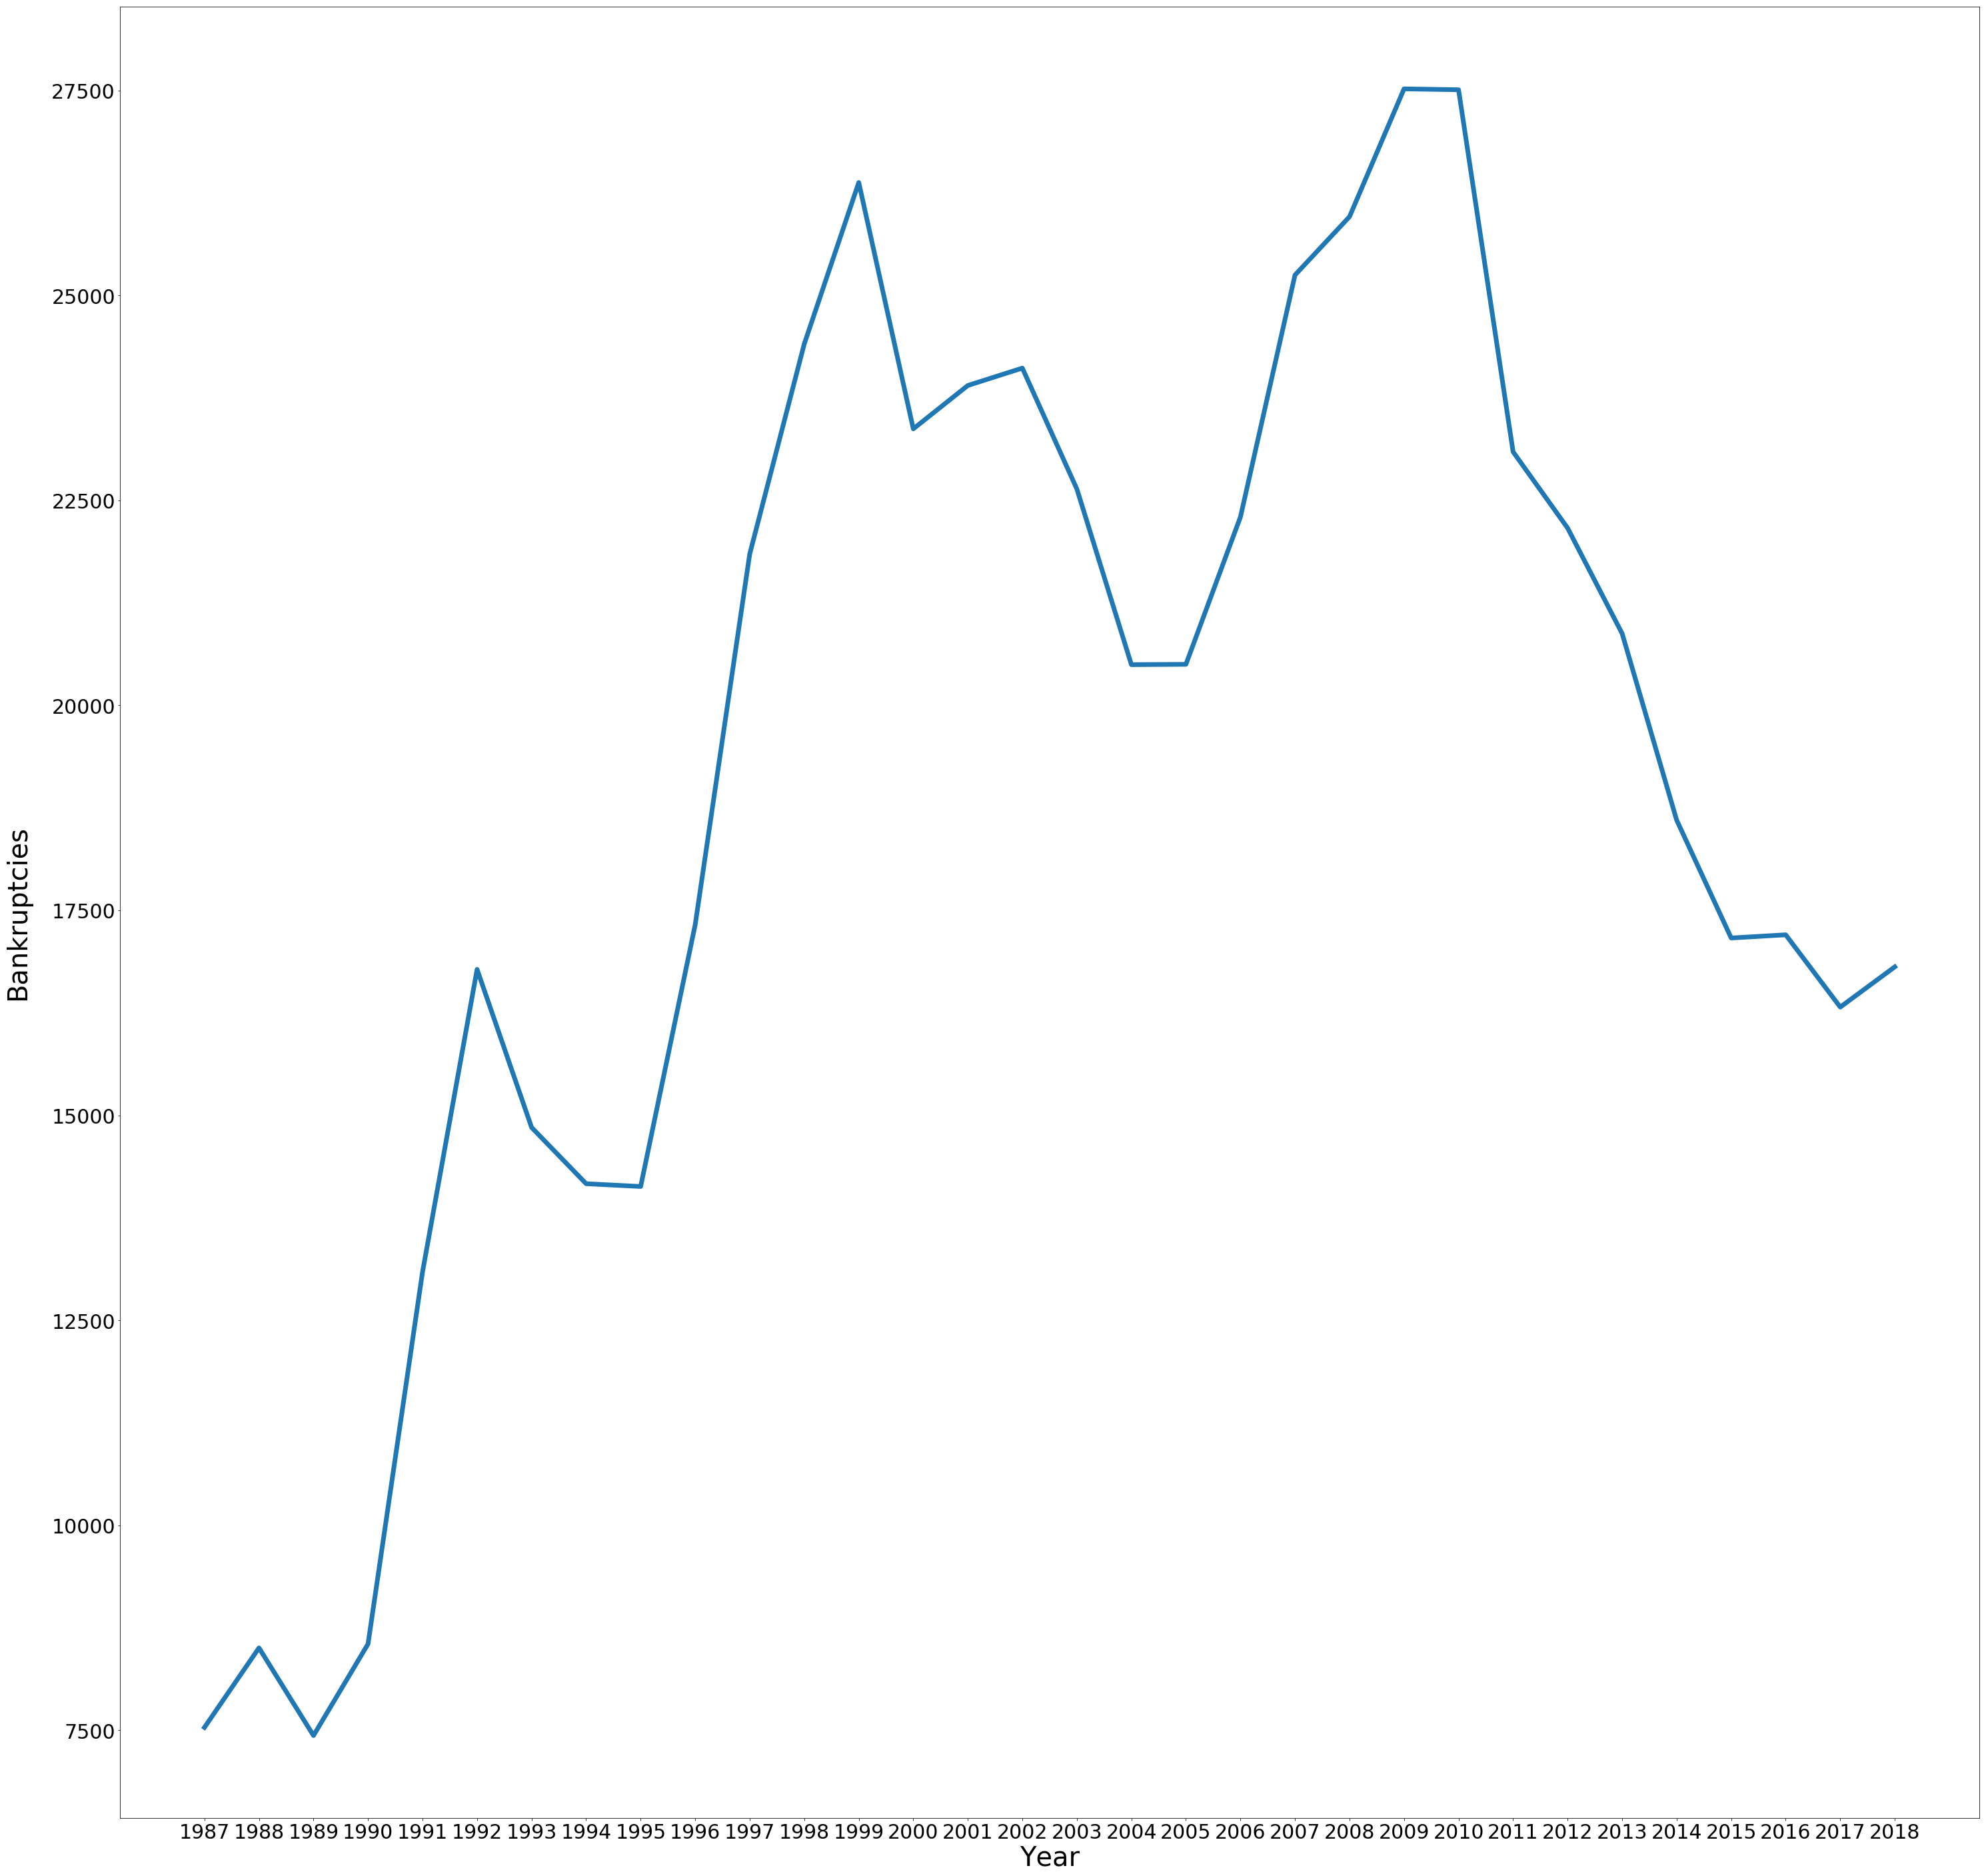

In [179]:
#Set x and y axis

x = df['Financial_Year_End']
y = df['Total'] = pd.to_numeric(dfplot['Total'], errors='coerce')

#Plot trend

plt.figure(figsize=(50,50))
plt.plot(x,y, linewidth = 7.0)
plt.ylabel('Bankruptcies', size = 40, labelpad=30)
plt.xlabel('Year', size = 40)
plt.yticks(size = 30)
plt.xticks(size = 30)
plt.show()


It appears that personal bankruptices in Australia are higher during US recessions.